In [1]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('CKD_clean.csv')

# Part 1.
### Risk Factors for CKD

Let's look at the distributions of values for patients with and without CKD.

ValueError: num must be 1 <= num <= 16, not 17

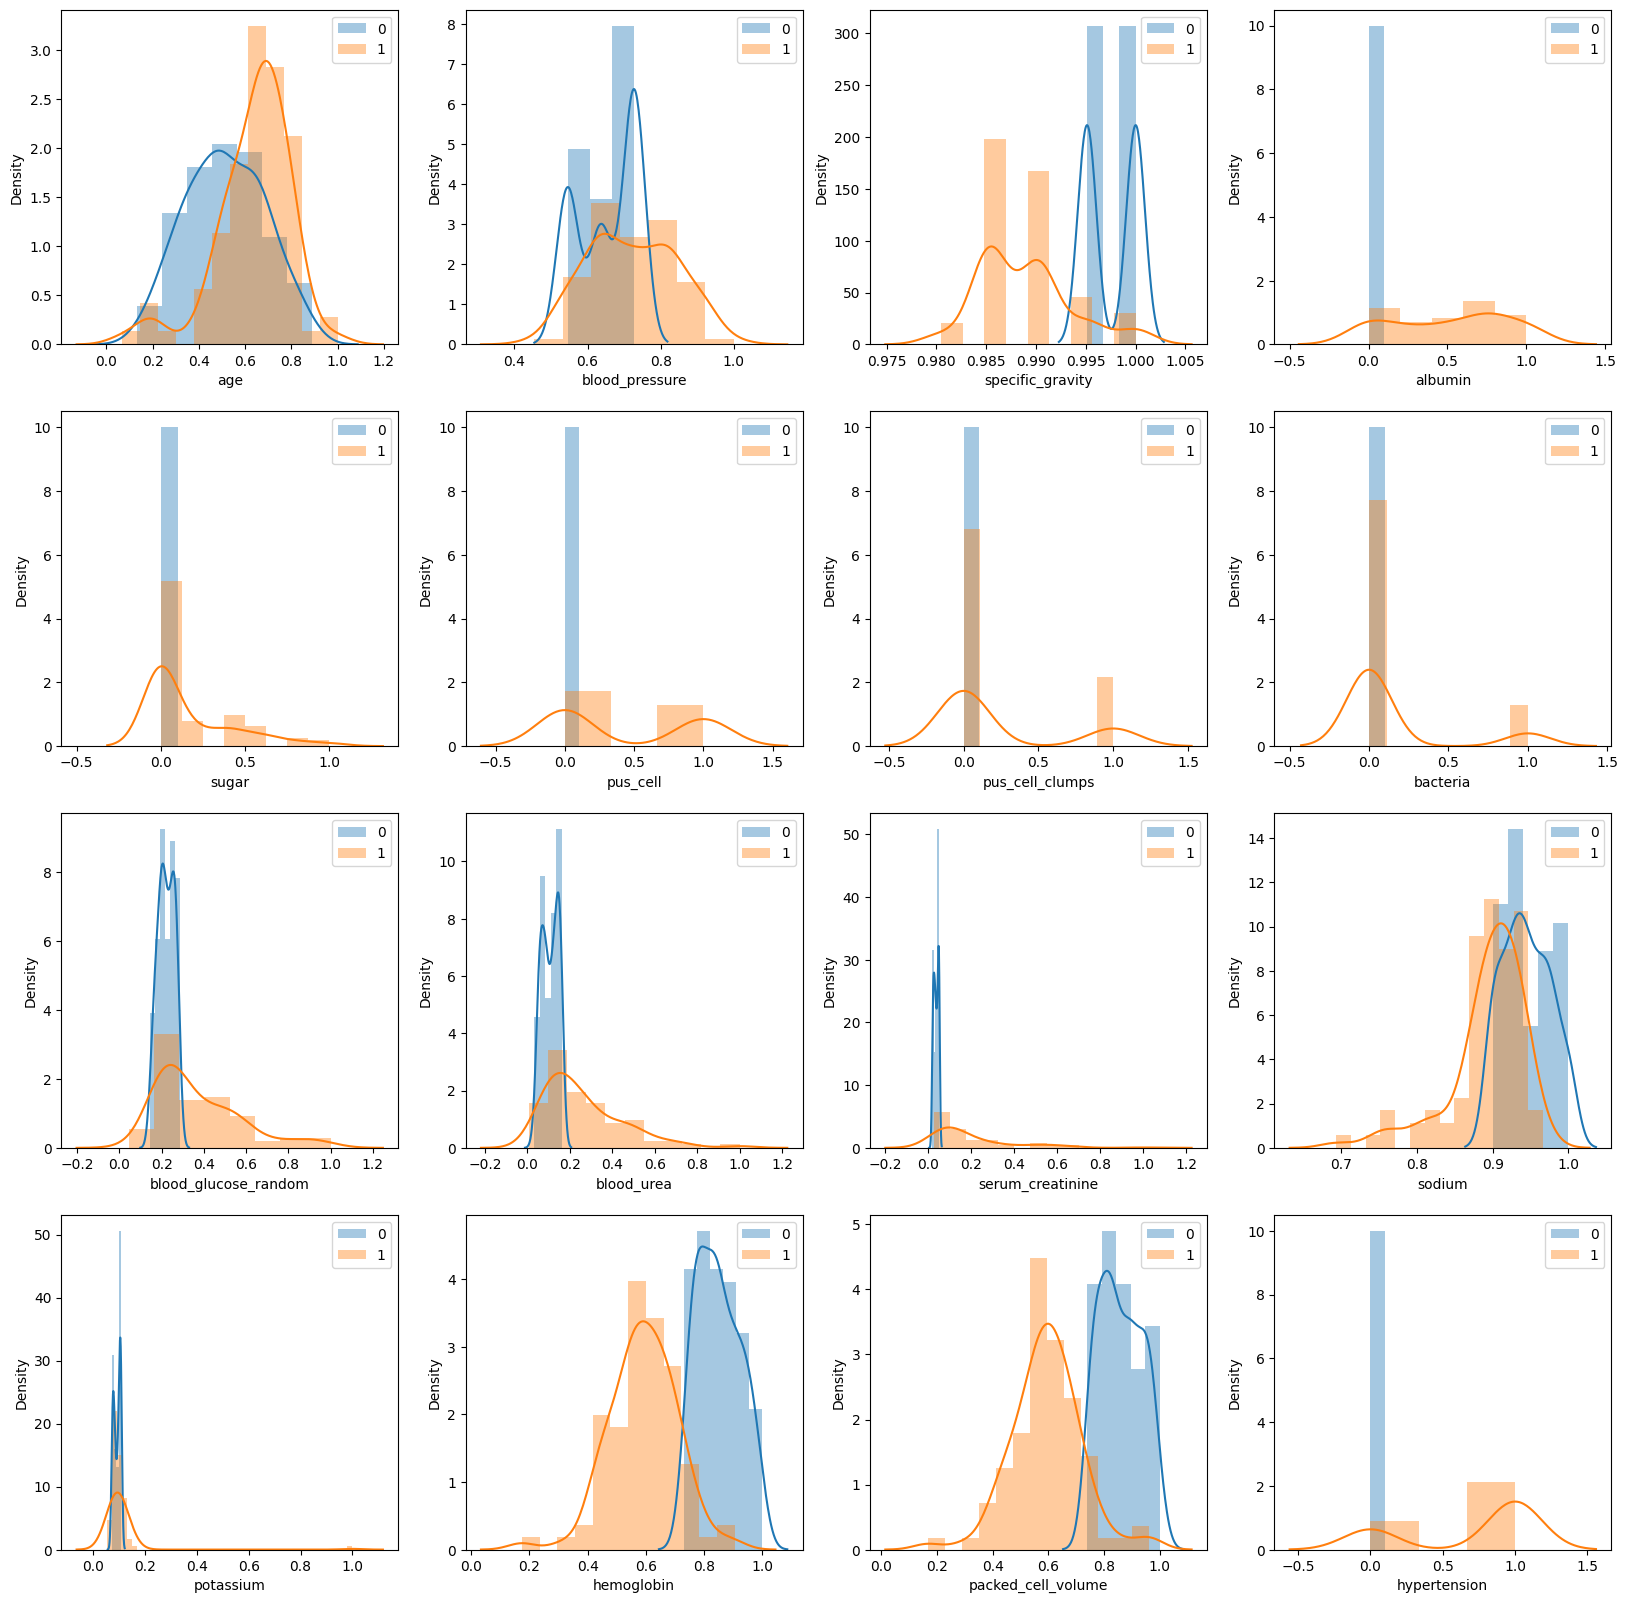

In [2]:
# graph distributions of every variable for class 0 and 1

plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.loc[df['class'] == 0, col], label='0')
    sns.distplot(df.loc[df['class'] == 1, col], label='1')
    plt.legend()
plt.show()


Most of these features seam to be bimodal in both classes...

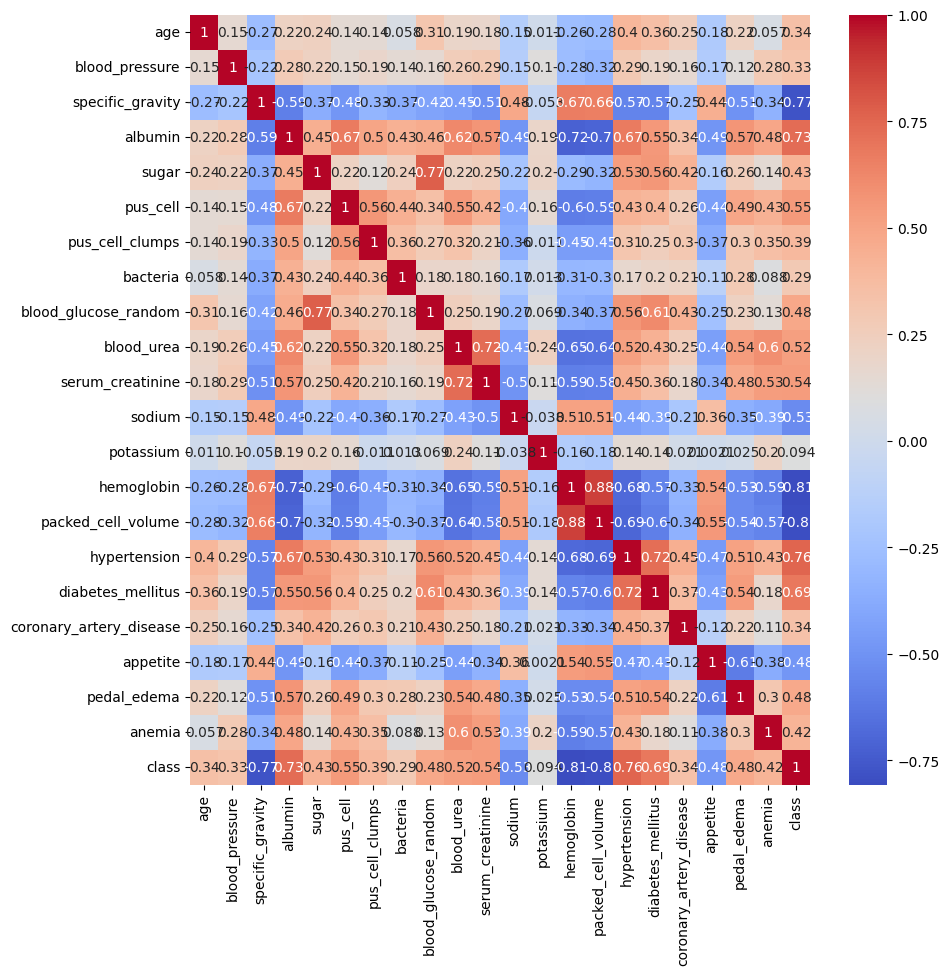

In [3]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


It seems the most anticorrelated items are hemoglobin and packed_cell_volume to blood_urea and serum_creatine.  This stands to reason, considering the illness.

The most obviously correlated items are sugar to blood_glucose_random and a direct relationship between the target and hypertension, diabetes_mellitus, and albumin.

# Part 2.
#### Potential CKD Subtypes

As noted earlier, both classes for the dependent variable seem to be bimodal in many cases.  This suggests that there should be two subtypes.

We should take a look at the features and see if any binary features stick out.

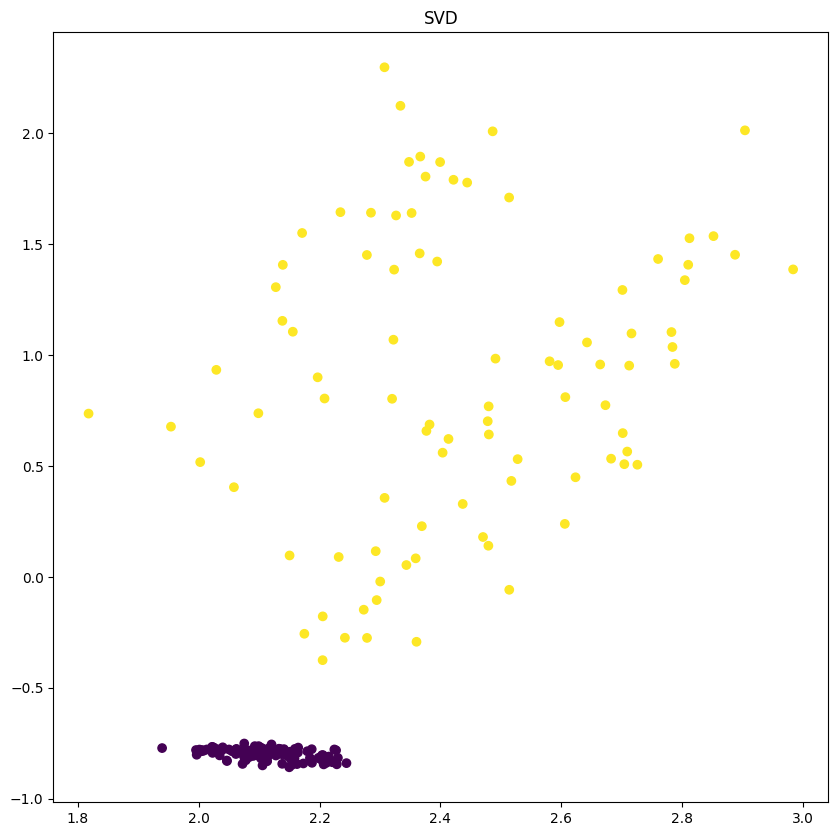

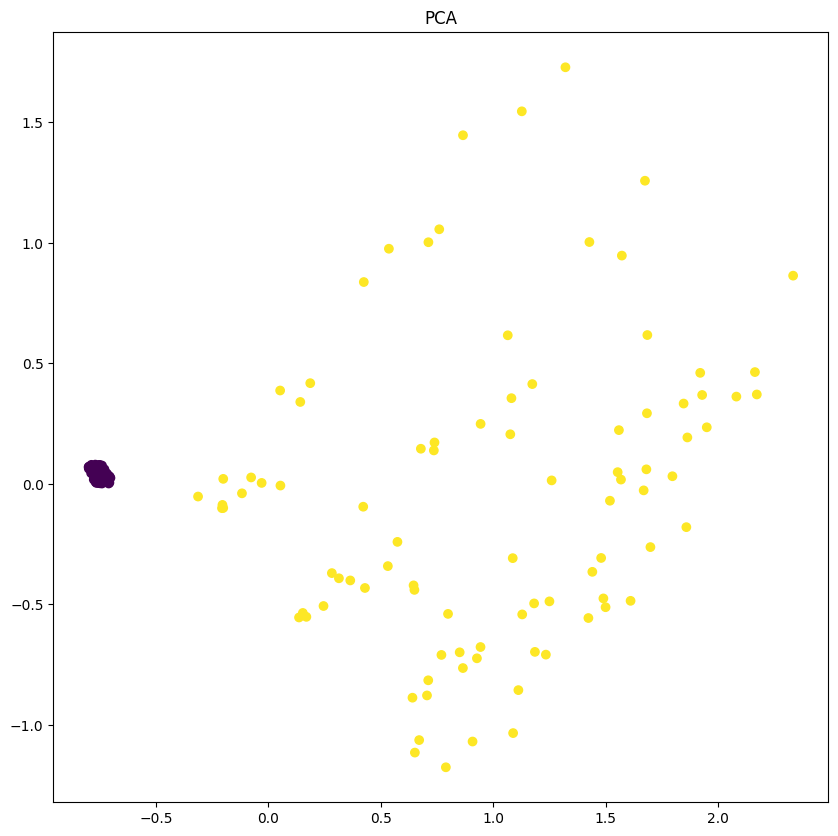

In [4]:
# singular value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(df)
svd.explained_variance_ratio_

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca.explained_variance_ratio_
# graph SVD and PCA
plt.figure(figsize=(10,10))
plt.scatter(svd.fit_transform(df)[:,0], svd.fit_transform(df)[:,1], c=df['class'])
plt.title('SVD')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=df['class'])
plt.title('PCA')
plt.show()


It's not immediately obvious, but maybe there are two clusters in the principal components.

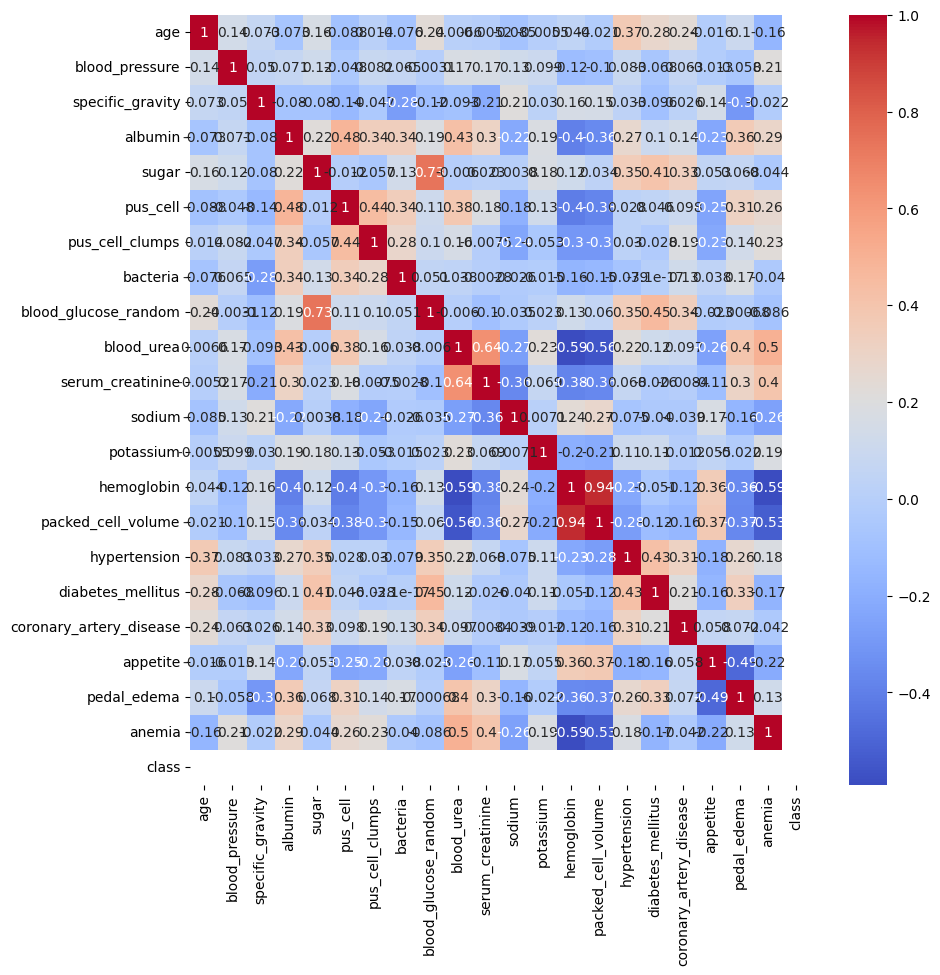

In [7]:
# dataframe of just the postive class
df_pos = df.loc[df['class'] == 1]

# dataframe of just the negative class
df_neg = df.loc[df['class'] == 0]

# correlation matrix for positive class
corr_pos = df_pos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_pos, annot=True, cmap='coolwarm')
plt.show()


Using the same trick again, we can see a bit clearer, that there are a large group of correlations related to blood_glucose_random to sugar, which may indicate a diabetic subtype, and another high correlation surrounding packed_cell_volume to hemoglobin.  In this case, we consider closeness to these high correlations in terms of effect on one of the component axes.

So, we may have two subtypes: people with serious blood sugar imbalances, and people with extremely heavy blood who are maybe losing protein as shown by blood_urea to serum_creatine.